# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import tweepy
from tweepy import OAuthHandler
import json
import datetime
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [2]:
#import twitter archive
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#import tweet image predictions .tsv using requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

df_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

2356

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568


In [6]:
tweet_list = []

with open ('tweet-json.txt', 'r') as file:
    for tweet in file:
        tweets = json.loads(tweet)
        tweet_id = tweets['id']
        favorite_tweet = tweets['favorite_count']
        retweets = tweets['retweet_count']
        tweet_list.append({'tweet_id': tweet_id,
                        'favorites': favorite_tweet,
                        'retweets': retweets})

df_tweet = pd.DataFrame(tweet_list, columns = ['tweet_id', 'favorites', 'retweets'])
df_tweet.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
#check sample of df_archive
df_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None,pupper,None
2098,670727704916926465,NaN,NaN,2015-11-28 22:15:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrie. He's a handheld pup. Excellen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670727704...,10,10,Jeffrie,None,None,None,None
2065,671151324042559489,NaN,NaN,2015-11-30 02:18:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*struggling to breathe properly* 12/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671151324...,12,10,None,None,None,None,None
1938,673906403526995968,NaN,NaN,2015-12-07 16:46:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys I'm getting real tired of this. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673906403...,3,10,None,None,None,None,None
1376,701805642395348998,NaN,NaN,2016-02-22 16:27:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Please pray for this pupper. Nothing wrong wit...,NaN,NaN,NaN,https://vine.co/v/ivV6Y37mH5Z,11,10,None,None,None,pupper,None
1794,677328882937298944,NaN,NaN,2015-12-17 03:26:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. All the dogs adore Derek. He's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677328882...,10,10,Derek,None,None,None,None
951,751950017322246144,NaN,NaN,2016-07-10 01:23:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Lola. She's a surfing pupper. 13/10 ma...,NaN,NaN,NaN,https://vine.co/v/5WrjaYAMvMO,13,10,Lola,None,None,pupper,None
809,771500966810099713,NaN,NaN,2016-09-02 00:12:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dakota. He's just saying hi. That's al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771500966...,12,10,Dakota,None,None,None,None
1461,694925794720792577,NaN,NaN,2016-02-03 16:49:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Please only send in dogs. This t-rex is very s...,NaN,NaN,NaN,https://vine.co/v/iJvUqWQ166L,5,10,None,None,None,None,None
266,841833993020538882,NaN,NaN,2017-03-15 02:10:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Ken. His cheeks are mag...,8.174239e+17,4.196984e+09,2017-01-06 17:33:29 +0000,https://twitter.com/dog_rates/status/817423860...,13,10,Ken,None,None,None,None


In [8]:
#check if tweet_id is unique
df_archive.tweet_id.duplicated().sum()

0

In [9]:
#check datatypes and missings
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
#check if number in column rating_numerator are logical
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [11]:
#check if number in column rating_denominator is always 10
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
#check if typos or missing in column name
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Penny          10
Lola           10
Tucker         10
Bo              9
Winston         9
the             8
Sadie           8
Daisy           7
an              7
Toby            7
Buddy           7
Bailey          7
Scout           6
Leo             6
Milo            6
Jack            6
Bella           6
Koda            6
Jax             6
Rusty           6
Oscar           6
Dave            6
Stanley         6
Chester         5
             ... 
Pinot           1
Grey            1
Farfle          1
Tyrus           1
Pupcasso        1
Miley           1
Rueben          1
Baron           1
Maya            1
Maisey          1
Gòrdón          1
Nida            1
Alejandro       1
Chesterson      1
Combo           1
Howie           1
Adele           1
Ronnie          1
Mike            1
Kaiya           1
Mo              1
Grady           1
Petrick         1
Pip             1
Devón     

In [13]:
#check sample of df_predictions
df_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
822,693109034023534592,https://pbs.twimg.com/ext_tw_video_thumb/69310...,1,cocker_spaniel,0.740013,True,Welsh_springer_spaniel,0.088739,True,golden_retriever,0.047470,True
405,673707060090052608,https://pbs.twimg.com/media/CVl8_EPWoAAcuSC.jpg,1,German_short-haired_pointer,0.935771,True,kelpie,0.022561,True,Labrador_retriever,0.008847,True
223,670303360680108032,https://pbs.twimg.com/media/CU1lWFaVAAAl0HG.jpg,1,Shetland_sheepdog,0.380278,True,Cardigan,0.342806,True,guinea_pig,0.156249,False
39,666649482315059201,https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg,1,Border_collie,0.447803,True,English_springer,0.170497,True,collie,0.139206,True
1577,796116448414461957,https://pbs.twimg.com/media/CwxfrguUUAA1cbl.jpg,1,Cardigan,0.700182,True,Pembroke,0.260738,True,papillon,0.017110,True
595,679511351870550016,https://pbs.twimg.com/media/CW4b-GUWYAAa8QO.jpg,1,Chihuahua,0.761972,True,black-footed_ferret,0.150605,False,squirrel_monkey,0.028148,False
1652,809808892968534016,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,Labrador_retriever,0.861651,True,golden_retriever,0.044462,True,Staffordshire_bullterrier,0.016497,True
270,670822709593571328,https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg,1,web_site,0.993887,False,Chihuahua,0.001252,True,menu,0.000599,False
1980,871032628920680449,https://pbs.twimg.com/media/DBaHi3YXgAE6knM.jpg,1,kelpie,0.398053,True,macaque,0.068955,False,dingo,0.050602,False
1212,743210557239623680,https://pbs.twimg.com/media/ClBqDuDWkAALK2e.jpg,1,golden_retriever,0.930705,True,Chesapeake_Bay_retriever,0.025934,True,Labrador_retriever,0.007535,True


In [14]:
#check if tweet_id is unique
df_predictions.jpg_url.duplicated().sum()

66

In [15]:
#check datatypes and missings
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
#check sample of df_tweet
df_tweet

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [17]:
#check data types
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null int64
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Quality issues
1. Column Expanded_urls is missing data

2. rating_denominator is not always 10, rating_numerator values not always valid (goes to +1000)

3. Retweeted_status_timestamp and timestamp type string instead of type datetime. p1, p2, p3 should be type categorical instead of type string

4. p1, p2, p3 not all dog breeds are lowercase

5. 181 retweets

6. Column 'jpg_url' has duplicated values

7. Delete values that are not dogs (p_1, p_2, P_3 are False)

8. Column 'name' has illogical values (None, a, an,...)

### Tidiness issues
1. ale datasets should be merged

2. combine colums floofer/doggo/pupper/puppo into one column

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [18]:
# Make copies of original pieces of data
archive_clean = df_archive.copy()
predictions_clean = df_predictions.copy()
tweet_clean = df_tweet.copy()
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #1: Delete retweets

#### Define:
<r> As we only want original tweets, we need to remove the 181 retweets detected in columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. We will remove these rows by keeping the na-rows for column retweeted_status_id

#### Code

In [19]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isna()]

#### Test

In [20]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [21]:
archive_clean = archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis = 1)

As you can see in column above all values in columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are zero. Because these columns don't provide useful information anymore, we will drop them.

In [22]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


### Issue #2: Column Expanded_urls is missing data

#### Define
Column expanded_urls contains NaN values, we will remove these rows from the dataset using dropna function

#### Code

In [23]:
archive_clean.dropna(subset = ['expanded_urls'], inplace = True)

https://www.w3schools.com/python/pandas/ref_df_dropna.asp
<br>https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan

#### Test

In [24]:
archive_clean.expanded_urls.isna().sum()

0

### Issue #3: Lowercase columns p1, p2, p3

#### Define
Some entries in columns p1, p2, p3 are lowercase, some are uppercase.
We will lowercase all values in colums p1, p2 and p3, and replace '_' by ' '.

#### Code

In [25]:
predictions_clean.p1 = predictions_clean.p1.str.lower()
predictions_clean.p2 = predictions_clean.p2.str.lower()
predictions_clean.p3 = predictions_clean.p3.str.lower()

In [26]:
predictions_clean.p1 = predictions_clean.p1.str.replace('_', ' ')
predictions_clean.p2 = predictions_clean.p2.str.replace('_', ' ')
predictions_clean.p3 = predictions_clean.p3.str.replace('_', ' ')

#### Test

In [27]:
predictions_clean.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
227,670374371102445568,https://pbs.twimg.com/media/CU2l7yvXAAUyYIJ.jpg,1,english springer,0.974936,True,english setter,0.011661,True,cocker spaniel,0.002689,True
497,675798442703122432,https://pbs.twimg.com/media/CWDrGH4UYAARoq_.jpg,1,beagle,0.681218,True,basset,0.125121,True,boxer,0.080398,True
1656,810657578271330305,https://pbs.twimg.com/media/C0AIwgVXAAAc1Ig.jpg,1,malamute,0.753521,True,siberian husky,0.166151,True,eskimo dog,0.069811,True
1354,760252756032651264,https://pbs.twimg.com/media/Coz12OLWgAADdys.jpg,1,radio telescope,0.155279,False,dam,0.154515,False,crane,0.098040,False
1208,742385895052087300,https://pbs.twimg.com/media/Ck18CFcXIAAUWoy.jpg,1,cardigan,0.566911,True,border collie,0.117566,True,appenzeller,0.047664,True
1337,758405701903519748,https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg,4,chesapeake bay retriever,0.702954,True,laptop,0.092277,False,notebook,0.032727,False
854,696488710901260288,https://pbs.twimg.com/media/CapsyfkWcAQ41uC.jpg,1,briard,0.369063,True,scotch terrier,0.168204,True,giant schnauzer,0.120553,True
35,666437273139982337,https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg,1,chihuahua,0.671853,True,beagle,0.124680,True,saluki,0.044094,True
462,674805413498527744,https://pbs.twimg.com/ext_tw_video_thumb/67480...,1,english springer,0.594467,True,cocker spaniel,0.389994,True,welsh springer spaniel,0.007096,True
1402,768970937022709760,https://pbs.twimg.com/ext_tw_video_thumb/76896...,1,pomeranian,0.182358,True,golden retriever,0.110658,True,mousetrap,0.086399,False


### Issue #4: Wrong column types

#### Define
Columns p1, p2, p3 should be type 'categorical' instead of type 'string'. Columns Retweeted_status_timestamp and timestamp should be type 'datetime' instead of type 'string'. We're going to convert the first columns in to type 'categorical' and convert column timestamp (since we already removed column retweeted_status_timestamp from the dataset) in to type 'datetime'

#### Code

In [28]:
# to datetime
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

# to categorical
predictions_clean.p1 = predictions_clean.p1.astype('category')
predictions_clean.p2 = predictions_clean.p2.astype('category')
predictions_clean.p3 = predictions_clean.p3.astype('category')

#### Test

In [29]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 248.1+ KB


In [30]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


### Issue #5: rating denominator not always 10, rating numerator not always logical

#### Define
Delete rows with illogical rating_numerator values (we decided that we will remove all values above 15)
<br> Change all values to 10 for column rating_denominator

In [31]:
archive_clean.rating_numerator.value_counts()

12      489
10      436
11      417
13      295
9       154
8        98
7        52
14       40
5        34
6        32
3        19
4        16
2         9
1         5
0         2
60        1
24        1
26        1
44        1
50        1
165       1
80        1
84        1
88        1
143       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
121       1
144       1
Name: rating_numerator, dtype: int64

#### Code

In [32]:
archive_clean = archive_clean.query("rating_numerator <= 15")

In [33]:
archive_clean['rating_denominator'] = 10

#### Test

In [34]:
archive_clean.rating_numerator.value_counts()

12    489
10    436
11    417
13    295
9     154
8      98
7      52
14     40
5      34
6      32
3      19
4      16
2       9
1       5
0       2
Name: rating_numerator, dtype: int64

In [35]:
archive_clean.rating_denominator.value_counts()

10    2098
Name: rating_denominator, dtype: int64

### Issue #6: Column 'jpg_url' has 66 duplicated rows

#### Define
We noticed there are 66 tweets (rows) with duplicate jpg_urls. We will these duplicates and keep the first ones.

In [36]:
predictions_clean = predictions_clean.drop_duplicates(subset = ['jpg_url'], keep = 'first')

#### Code

In [37]:
predictions_clean.jpg_url.duplicated().sum()

0

###  Issue #7: Delete non-dog rows

#### Define
Delete rows that are set to false in columns p1_dog, p2_dog, p3_dog.
Because some rows have different values in p1_dog, p2_dog and p3_dog we only keep the rows where all 3 columns are True

#### Code

In [38]:
predictions_clean = predictions_clean[(predictions_clean.p1_dog == True) & (predictions_clean.p2_dog == True)  & (predictions_clean.p3_dog == True)]

#### Test

In [39]:
predictions_clean[predictions_clean.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [40]:
predictions_clean[predictions_clean.p2_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [41]:
predictions_clean[predictions_clean.p3_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #8: Non dog names in column 'name'

#### Define
We noticed there are illogical entries in the column 'name', such 'as a, an,quitte,...'
All these illogical values are lowercase, where as all real dog names starts with an uppercase first letter.
We will use a regex expression to filter the dataset and change these values to 'None'.

#### Code

In [42]:
#copy archive clean
archive_clean2 = archive_clean.copy()

In [43]:
#use regex to select all rows starting with lowercase letter in column name
archive_clean2 = archive_clean2[archive_clean2.name.str.contains('^[a-z]+')]

In [44]:
#replace entries in row 'name' to 'None'
archive_clean2['name'] = 'None'
archive_clean2

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,None,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,None,None,None,pupper,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,None,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",https://twitter.com/dog_rates/status/855459453...,12,10,None,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,None,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",https://twitter.com/dog_rates/status/828650029...,14,10,None,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,https://twitter.com/dog_rates/status/806219024...,11,10,None,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,None,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10,10,None,None,None,None,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,https://twitter.com/dog_rates/status/770655142...,11,10,None,None,None,None,None


In [45]:
#use regex to select all rows starting with uppercase letter in column name
archive_clean = archive_clean[archive_clean.name.str.contains('^[A-Z]+')]
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [46]:
#concat both dataframes
archive_clean = pd.concat([archive_clean, archive_clean2], ignore_index=True)
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


https://regexpattern.com/first-letter-uppercase/
<br>https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html

#### Test

In [47]:
archive_clean.name.value_counts()

None          712
Charlie        11
Lucy           11
Cooper         10
Oliver         10
Penny           9
Tucker          9
Winston         8
Sadie           8
Lola            8
Daisy           7
Toby            7
Oscar           6
Bailey          6
Bo              6
Koda            6
Bella           6
Stanley         6
Jax             6
Scout           5
Leo             5
Buddy           5
Rusty           5
Milo            5
Louis           5
Dave            5
Bentley         5
Chester         5
Boomer          4
Chip            4
             ... 
Naphaniel       1
Evy             1
Sunshine        1
Ralphus         1
Tebow           1
Poppy           1
Devón           1
Pip             1
Gòrdón          1
Snicku          1
Ben             1
Lupe            1
Dook            1
Zuzu            1
Emmie           1
Milky           1
Puff            1
Kramer          1
Nida            1
Petrick         1
Alejandro       1
Chesterson      1
Combo           1
Howie           1
Adele     

### Issue #9: combine colums floofer/doggo/pupper/puppo into one column (Tidiness)

#### Define
Merge columns 'doggo', 'floofer', 'pupper', 'puppo' in to 1 column and remove original columns using max-function

#### Code

In [48]:
#combine 4 dog category columns into 1
archive_clean['dog_category'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [49]:
# drop original columns
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

https://stackoverflow.com/questions/20033111/python-pandas-add-column-for-row-wise-max-value-of-selected-columns

#### Test

In [50]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 11 columns):
tweet_id                 2098 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                2098 non-null datetime64[ns]
source                   2098 non-null object
text                     2098 non-null object
expanded_urls            2098 non-null object
rating_numerator         2098 non-null int64
rating_denominator       2098 non-null int64
name                     2098 non-null object
dog_category             2098 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 180.4+ KB


### Issue #10: Merge all 3 tables (Tidiness)

#### Define
Merge all 3 datasets into 1 dataset

#### Code

In [51]:
archive_clean = pd.merge(archive_clean, predictions_clean, on = 'tweet_id', how ='left')

In [52]:
archive_clean = pd.merge(archive_clean, tweet_clean, on = 'tweet_id', how ='left')

#### Test 

In [53]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2097
Data columns (total 24 columns):
tweet_id                 2098 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                2098 non-null datetime64[ns]
source                   2098 non-null object
text                     2098 non-null object
expanded_urls            2098 non-null object
rating_numerator         2098 non-null int64
rating_denominator       2098 non-null int64
name                     2098 non-null object
dog_category             2098 non-null object
jpg_url                  1190 non-null object
img_num                  1190 non-null float64
p1                       1190 non-null category
p1_conf                  1190 non-null float64
p1_dog                   1190 non-null object
p2                       1190 non-null category
p2_conf                  1190 non-null float64
p2_dog                   1190 non-null object
p3       

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [54]:
archive_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index = False)

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:


1. Highest rated dog category (exclude non-values)

In [55]:
dog_rating = archive_clean.query('dog_category != "None"').groupby('dog_category')['rating_numerator'].mean()
dog_rating

dog_category
doggo      11.847222
floofer    11.800000
pupper     10.748918
puppo      12.041667
Name: rating_numerator, dtype: float64

Text(0.5,1,'Average rating per dog category')

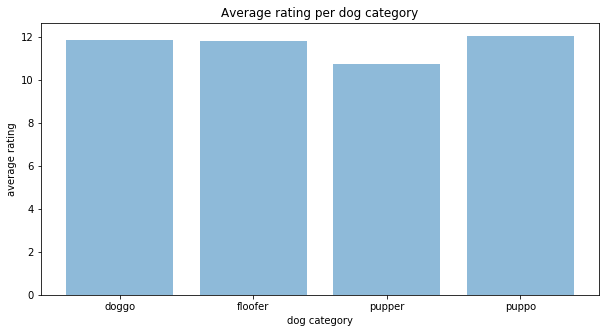

In [56]:
plt.subplots(figsize=(10, 5))
plt.bar([1,2,3,4], dog_rating, tick_label = ['doggo', 'floofer', 'pupper', 'puppo'], alpha = 0.5)
plt.xlabel('dog category')
plt.ylabel('average rating')
plt.title('Average rating per dog category')


On average dog category 'puppo' has the highest average rating. However, the average rating might be influenced by the amount of entries in the dataset per dog category

2. Top 20 tweeted dog types (based on column p1)

Text(0.5,1,'top 20 tweeted dog types')

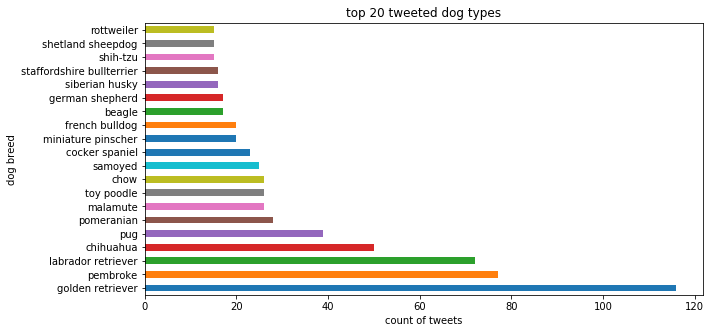

In [57]:
plt.subplots(figsize=(10, 5))
archive_clean.p1.value_counts().nlargest(20).plot(kind = 'barh')
plt.xlabel('count of tweets')
plt.ylabel('dog breed')
plt.title('top 20 tweeted dog types')

Golden retriever is the dog breed that is most tweeted, followed by pembroke and labrador retriever. The top 20 is closed by rottweiler

3. Relation between favorites and ratings

Text(0.5,1,'scatter ratings and favorites')

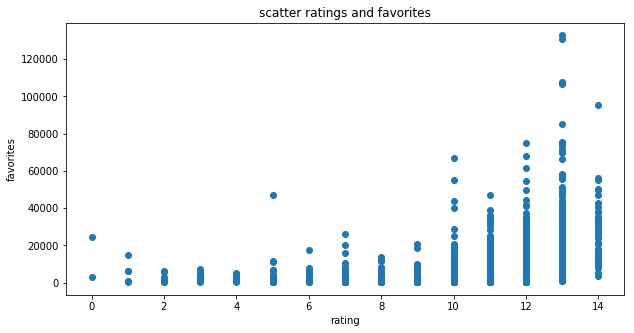

In [58]:
plt.subplots(figsize=(10, 5))
plt.scatter(x = archive_clean['rating_numerator'], y = archive_clean['favorites'])
plt.xlabel('rating')
plt.ylabel('favorites')
plt.title('scatter ratings and favorites')

In [59]:
archive_clean.groupby('rating_numerator')['favorites'].mean()

rating_numerator
0     13871.000000
1      5599.800000
2      2256.777778
3      2395.526316
4      2842.937500
5      3921.441176
6      2716.968750
7      3462.173077
8      2438.989796
9      2567.772727
10     4131.635321
11     6937.354916
12    10948.073620
13    21859.149153
14    27977.800000
Name: favorites, dtype: float64

In [60]:
archive_clean.rating_numerator.value_counts()

12    489
10    436
11    417
13    295
9     154
8      98
7      52
14     40
5      34
6      32
3      19
4      16
2       9
1       5
0       2
Name: rating_numerator, dtype: int64

As we can see in insights and visuals above, higher ratings have a positive correlations with the amount of favorites. We also see that 0-rating has a high amount of favorites. But last insight shows us we only had two 0-rating.

4. Which month provides the most retweets

In [61]:
archive_clean['month'] = archive_clean['timestamp'].dt.month
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,month
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39467,8853,8
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,pekinese,0.090647,True,papillon,0.068957,True,33819,6514,8
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,7
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42908,8964,7
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,41048,9774,7
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20562,3261,7
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12041,2158,7
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,...,True,eskimo dog,0.178406,True,pembroke,0.076507,True,56848,16716,7
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,True,irish setter,0.193054,True,chesapeake bay retriever,0.118184,True,28226,4429,7
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,True,cardigan,0.451038,True,chihuahua,0.029248,True,32467,7711,7


In [62]:
rating_month = archive_clean.groupby('month')['retweets'].sum()
months = archive_clean.groupby('month')['retweets'].sum().index.tolist()[0:12]

Text(0.5,1,'retweets per month')

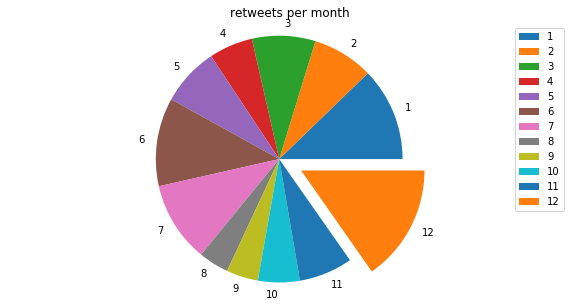

In [63]:
plt.subplots(figsize=(10, 5))
myexplode = (0,0,0,0,0,0,0,0,0,0,0,0.2)
plt.pie(rating_month, labels = months, explode = myexplode)
plt.axis('equal')
plt.legend()
plt.title('retweets per month')

In [64]:
rating_month

month
1     728120
2     476882
3     493965
4     341522
5     455914
6     688435
7     628175
8     235997
9     247643
10    325118
11    418269
12    908819
Name: retweets, dtype: int64

https://www.educative.io/edpresso/how-to-explode-a-pie-chart-using-matplotlib-in-python
<br>https://pandas.pydata.org/docs/reference/api/pandas.Index.tolist.html

December is the month with the most retweets. If we check insight below, we also have to notice that december is the month with the most tweets. So it might be normal that we have more retweets. That's why we will calculate the amount of retweet per tweet per month

In [65]:
archive_clean.groupby('month')['tweet_id'].count()

month
1     252
2     188
3     184
4     102
5     103
6     140
7     145
8      63
9      68
10     70
11    351
12    432
Name: tweet_id, dtype: int64

In [66]:
retweets_per_tweet = (archive_clean.groupby('month')['retweets'].sum()) / (archive_clean.groupby('month')['tweet_id'].count())
retweets_per_tweet

month
1     2889.365079
2     2536.606383
3     2684.592391
4     3348.254902
5     4426.349515
6     4917.392857
7     4332.241379
8     3745.984127
9     3641.808824
10    4644.542857
11    1191.649573
12    2103.747685
dtype: float64

Text(0.5,1,'retweets per per month')

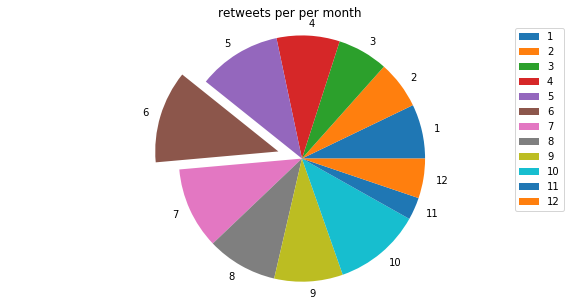

In [67]:
plt.subplots(figsize=(10, 5))
myexplode = (0,0,0,0,0,0.2,0,0,0,0,0,0)
plt.pie(retweets_per_tweet, labels = months, explode = myexplode)
plt.axis('equal')
plt.legend()
plt.title('retweets per per month')

The month June provides the most retweets per tweet.